# Variables categóricas y cuantitativas

Las variables categóricas y cuantitativas pueden representarse mediante una serie de diagramas en las que principalmente se comparar las categorías respecto a una característca numérica/cuantitativa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## [1. Diagramas de dispersión categóricos](#Cap1)
## [2. Gráficas de conteo y barras](#Cap2)
## [3. Diagramas de caja](#Cap3)
## [4. Diagrama de intervalo](#Cap4)

## Importar datos

In [2]:
# Importar conjunto de datos

df = pd.read_csv("../Datos/Students.csv", index_col=0)
df.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


## 1. Diagramas de enjambre<a class="anchor" id="Cap1"></a>

Diagrama de dispersión para cada uno de los niveles de una categoría. Se evalua la concentración de puntos para la variable cuantitativa en cada una de las categorías

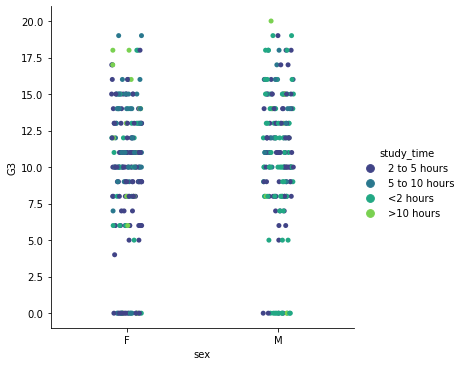

In [29]:
sns.catplot(x="sex", y="G3", data=df, kind="strip", palette="viridis", hue="study_time")
plt.show()

## 2. Gráficas de conteo y de barras<a class="anchor" id="Cap2"></a>

Gráfica para el conteo de observaciones o frecuencias de una variable categórica

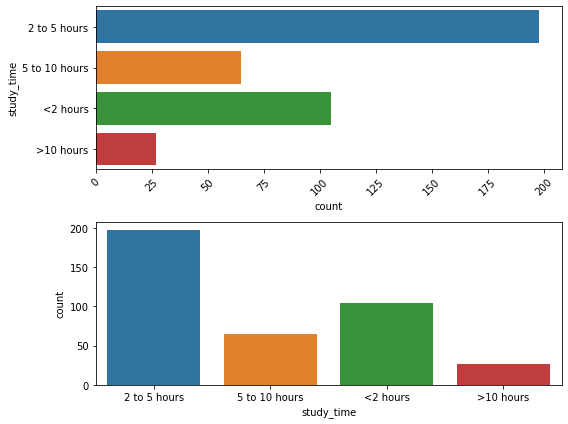

In [3]:
plt.figure(figsize=(8,6))                    # Tamaño del gráfico
plt.subplot(2,1,1)                           # Crear dos subgráficos (2 filas, 1 fila, 1 gráfico)
sns.countplot(y="study_time", data=df)       # Conteo para uso de internet
plt.xticks(rotation=45)                      # Cambiar la orientación de los ejes

plt.subplot(2,1,2)
sns.countplot(x="study_time", data=df)   # Conteo para uso de internet
plt.tight_layout()
plt.show()

En los diagramas de barras a diferencia de los de conteo ya relaciona una variable cuantitativa con una cualitativa. La altura en el diagrama de barra es el valor medio de la variable cuantitaviva sumado a su intervalo de confianza

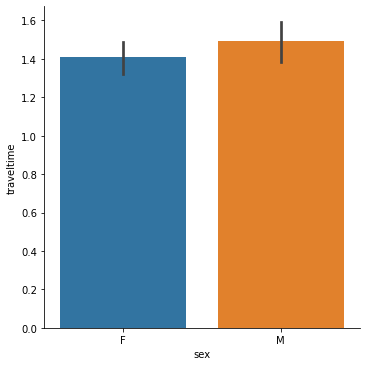

In [4]:
# La función catplot permite graficar diagramas de barras para clase e incluir intervalos de confianza

sns.catplot(x="sex", y="traveltime", data=df, kind="bar", order=["F","M"]) # Se muestra el valor promedio
plt.show()

## 3. Diagramas de caja<a class="anchor" id="Cap3"></a>

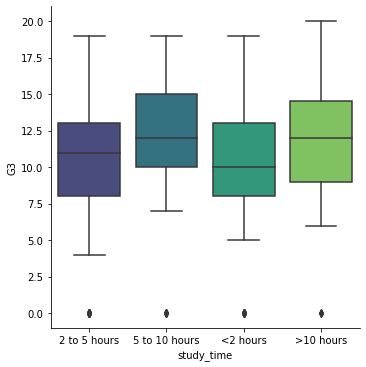

In [24]:
# Para la función catplot se define en el eje x los grupos a los cuales se les desea realizar el diagrama de cajas

sns.catplot(x="study_time", y="G3", data=df, kind="box", palette="viridis")
plt.show()

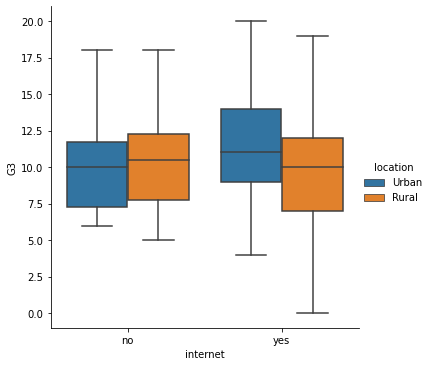

In [6]:
# Igualmente es posible distinguir al interir de un grupo diferentes sub grupos y hacer diagramas diferenciados

sns.catplot(x="internet", y="G3", data=df, kind="box", hue="location", sym="") # El argumento sym no muestra los atípicos
plt.show()

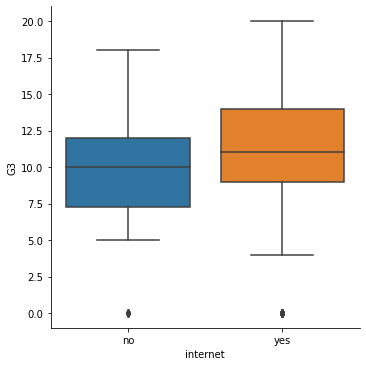

In [7]:
# En la visualización y elaboración de los diagramas de caja se suele tomar 1.5 rangos inter cuartiles para graficar los
# "bigotes". Ahora, es posible modificar este valor con el argumento whis, así:

sns.catplot(x="internet", y="G3", data=df, kind="box") # 1.5 rangos
#sns.catplot(x="internet", y="G3", data=df, kind="box", whis=0.5) # 0.5 rangos
#sns.catplot(x="internet", y="G3", data=df, kind="box", whis=[5,95]) # percenti 5 y 95
#sns.catplot(x="internet", y="G3", data=df, kind="box", whis=[0,100]) # Min y max
plt.show()

Los diagrama de violin funcionan como una alternativa igualmente informativa, donde las zonas más anchas indican una mayor concentración de los datos loq ue facilita la comparación entre los niveles de las categorías

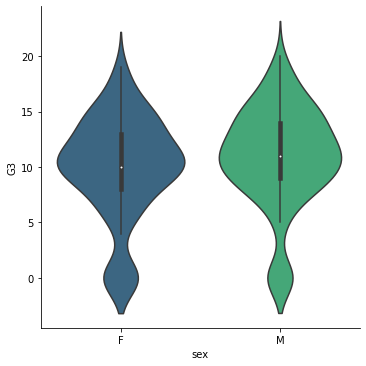

In [34]:
sns.catplot(x="sex", y="G3", data=df, kind="violin", palette="viridis")
plt.show()

## 4. Diagramas de intervalo (point plot)<a class="anchor" id="Cap4"></a>

Un tercer tipo de gráfico que permite relacionar variables categóricas con numéricas son los diagramas de intervalo o point plot. A disferencia de los diagramas de caja, esta representación construye un intervalo de confianza con una significancia del 5% y los compara entre los niveles de una categoría. Por defecto toma la media como estimador de tendencia 

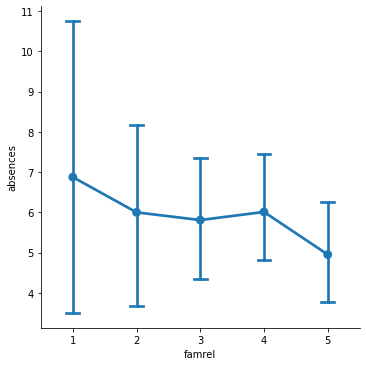

In [26]:
sns.catplot(x="famrel", y="absences", data=df, kind="point", capsize=0.2)
plt.show()

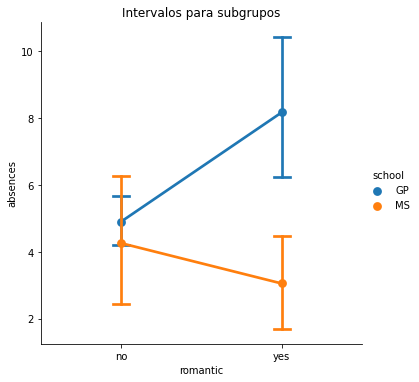

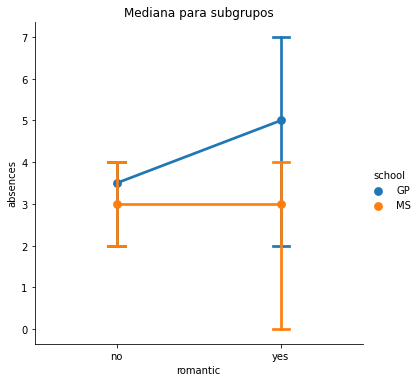

In [11]:
# Como en los casos anteriores, es posible realizar gráficos para subgrupos o si es el caso cambiar el estimador

sns.catplot(x="romantic", y="absences", data=df, kind="point", hue="school", capsize=0.1)
plt.title("Intervalos para subgrupos")

sns.catplot(x="romantic", y="absences", data=df, kind="point", hue="school", estimator=np.median, capsize=0.1)
plt.title("Mediana para subgrupos") # Se usa la mediana
plt.show()